In [1]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres'))

In [2]:
Antarctica = world[world['name'] == 'Antarctica'].iloc[0].name
world = world.drop(world.index[Antarctica])
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
from ipynb.fs.full.Clustering_Std_KMEANS import *


ipynb.fs.full.Clustering_Std_KMEANS:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [4]:
cluster_map

,data_index,cluster
0,DZA,5
1,TUR,6
2,SYC,7
3,ZWE,6
4,MWI,6
...,...,...
214,CRI,4
215,GNB,5
216,USA,9
217,AFG,1


In [5]:
merged = world.merge(cluster_map, left_on='iso_a3', right_on='data_index')

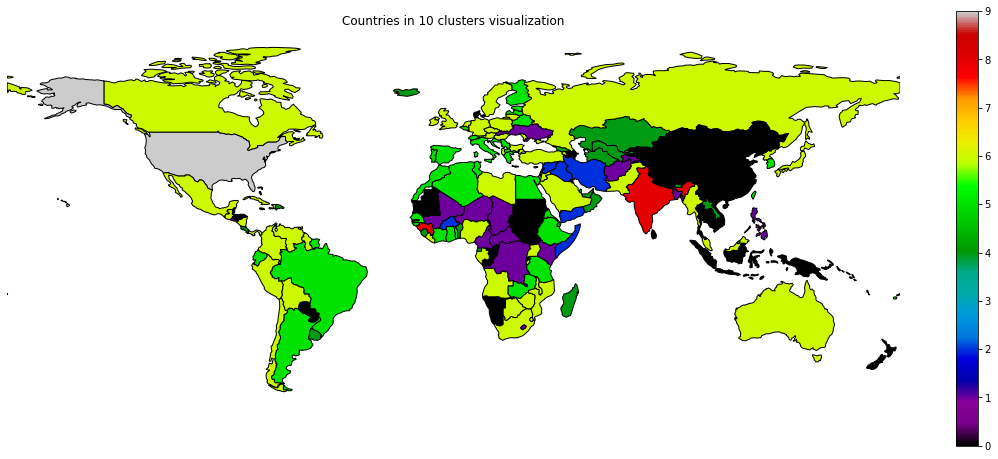

In [6]:
import mapclassify

# Note: this code sample requires geoplot>=0.4.0.
g = geoplot.choropleth(
    merged, hue=merged.cluster, figsize=(8, 4), legend=True, cmap='nipy_spectral'
)
g.set_title("Countries in 10 clusters visualization")
g.figure.set_size_inches(20,8)